# 🥇 CAMADA GOLD 🥇

### - EXAMES E CIRURGIAS

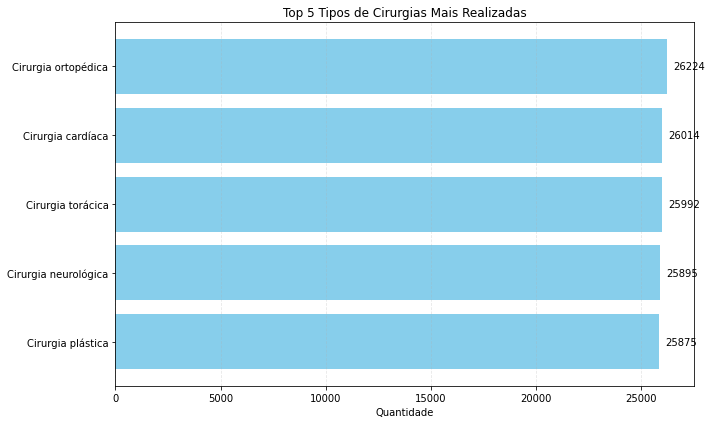

In [0]:
# 📥 Leitura do parquet
df_cirurgias_silver = spark.read.parquet("/mnt/silver/cirurgias")

# 📊 Agrupamento dos tipos de cirurgia
top_cirurgias = (
    df_cirurgias_silver.groupBy("tipo_cirurgia")
    .count()
    .orderBy("count", ascending=False)
    .limit(10)
)

# 🔄 Conversão para pandas
top_cirurgias_pd = top_cirurgias.toPandas()

# 📈 Gráfico com melhorias visuais
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
bars = plt.barh(top_cirurgias_pd["tipo_cirurgia"], top_cirurgias_pd["count"], color='skyblue')
plt.xlabel("Quantidade")
plt.title("Top 5 Tipos de Cirurgias Mais Realizadas")
plt.gca().invert_yaxis()

# 🧾 Adiciona rótulos de valor ao lado das barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + 300, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center')

plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.show()


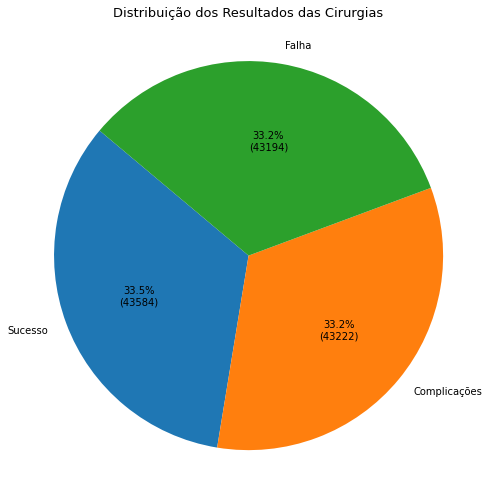

In [0]:
resultados = (
    df_cirurgias_silver.groupBy("resultado_cirurgia")
    .count()
    .orderBy("count", ascending=False)
)

resultados_pd = resultados.toPandas()

# Função para exibir % + valor
def format_label(pct, allvals):
    total = sum(allvals)
    val = int(round(pct * total / 100.0))
    return f'{pct:.1f}%\n({val})'

plt.figure(figsize=(7,7))
wedges, texts, autotexts = plt.pie(
    resultados_pd["count"],
    labels=resultados_pd["resultado_cirurgia"],
    autopct=lambda pct: format_label(pct, resultados_pd["count"]),
    startangle=140,
    textprops=dict(color="black", fontsize=10)
)

plt.title("Distribuição dos Resultados das Cirurgias", fontsize=13)
plt.axis("equal")
plt.tight_layout()
plt.show()


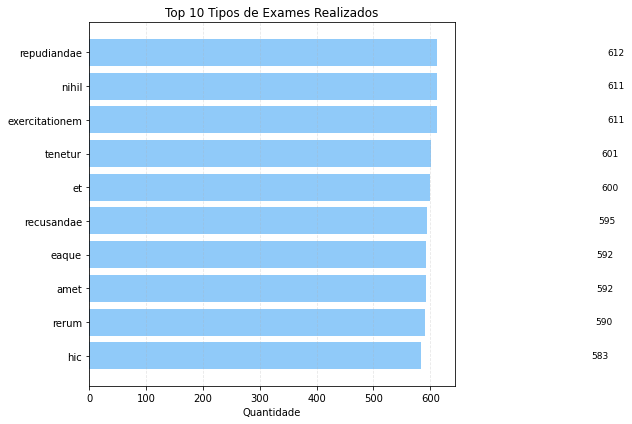

In [0]:
# 📥 Leitura da camada Silver dos exames
df_exames_silver = spark.read.parquet("/mnt/silver/exames")

# 📊 Agrupamento dos exames por nome
exames_agg = (
    df_exames_silver.groupBy("nome_exame")
    .count()
    .orderBy("count", ascending=False)
    .limit(10)
)

# 🔄 Conversão para Pandas
exames_pd = exames_agg.toPandas()

# 📈 Gráfico com valores absolutos
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
bars = plt.barh(exames_pd["nome_exame"], exames_pd["count"], color='#90caf9')
plt.xlabel("Quantidade")
plt.title("Top 10 Tipos de Exames Realizados")
plt.gca().invert_yaxis()

# 🧾 Adiciona os valores ao lado das barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + 300, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center', fontsize=9)

plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


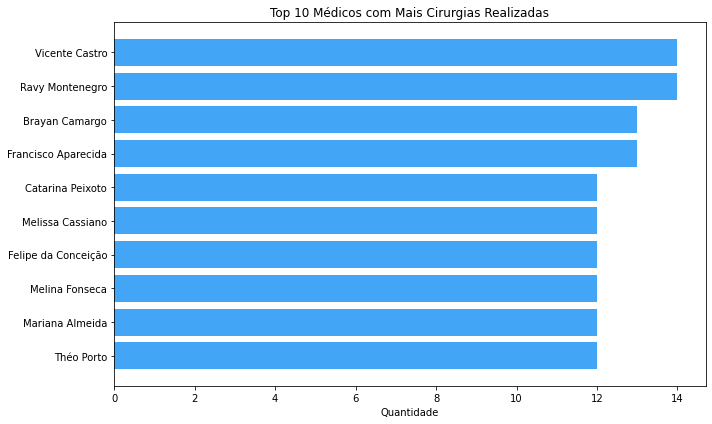

In [0]:
top_medicos = (
    df_cirurgias_silver.groupBy("nome_medico")
    .count()
    .orderBy("count", ascending=False)
    .limit(10)
)

top_medicos_pd = top_medicos.toPandas()
plt.figure(figsize=(10,6))
plt.barh(top_medicos_pd["nome_medico"], top_medicos_pd["count"], color="#42a5f5")
plt.title("Top 10 Médicos com Mais Cirurgias Realizadas")
plt.xlabel("Quantidade")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


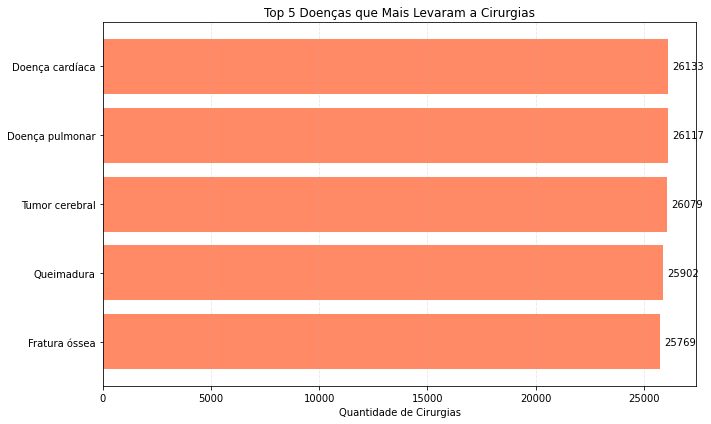

In [0]:
top_doencas = (
    df_cirurgias_silver.groupBy("doenca")
    .count()
    .orderBy("count", ascending=False)
    .limit(5)
)

top_doencas_pd = top_doencas.toPandas()

plt.figure(figsize=(10,6))
bars = plt.barh(top_doencas_pd["doenca"], top_doencas_pd["count"], color="#ff8a65")
plt.title("Top 5 Doenças que Mais Levaram a Cirurgias")
plt.xlabel("Quantidade de Cirurgias")
plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()
    plt.text(width + 200, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center')

plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.show()


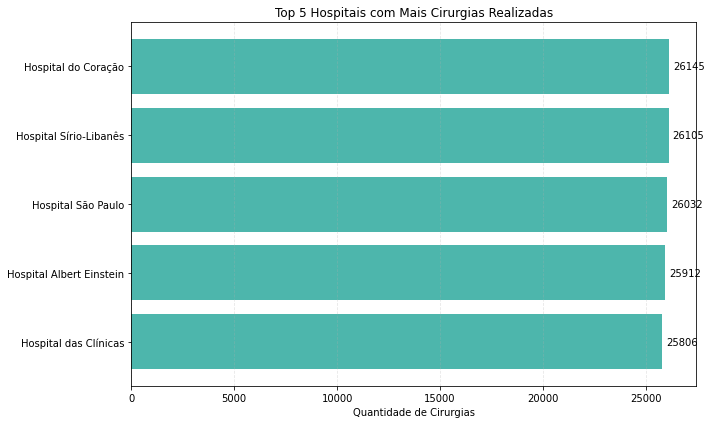

In [0]:
top_hospitais = (
    df_cirurgias_silver.groupBy("hospital")
    .count()
    .orderBy("count", ascending=False)
    .limit(5)
)

top_hospitais_pd = top_hospitais.toPandas()

plt.figure(figsize=(10,6))
bars = plt.barh(top_hospitais_pd["hospital"], top_hospitais_pd["count"], color="#4db6ac")
plt.title("Top 5 Hospitais com Mais Cirurgias Realizadas")
plt.xlabel("Quantidade de Cirurgias")
plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()
    plt.text(width + 200, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center')

plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.show()


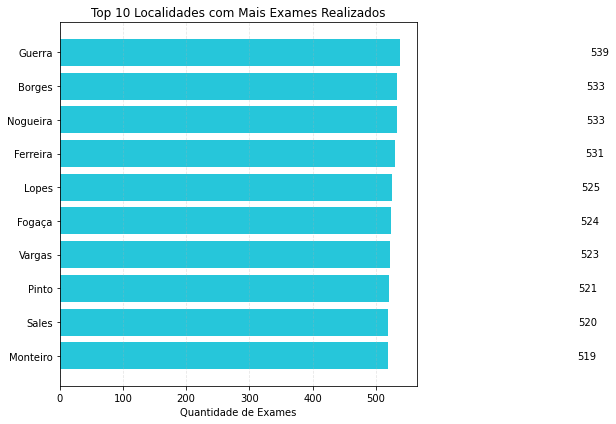

In [0]:
top_localidades = (
    df_exames_silver.groupBy("localidade")
    .count()
    .orderBy("count", ascending=False)
    .limit(10)
)

top_localidades_pd = top_localidades.toPandas()

plt.figure(figsize=(10,6))
bars = plt.barh(top_localidades_pd["localidade"], top_localidades_pd["count"], color="#26c6da")
plt.title("Top 10 Localidades com Mais Exames Realizados")
plt.xlabel("Quantidade de Exames")
plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()
    plt.text(width + 300, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center')

plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.show()


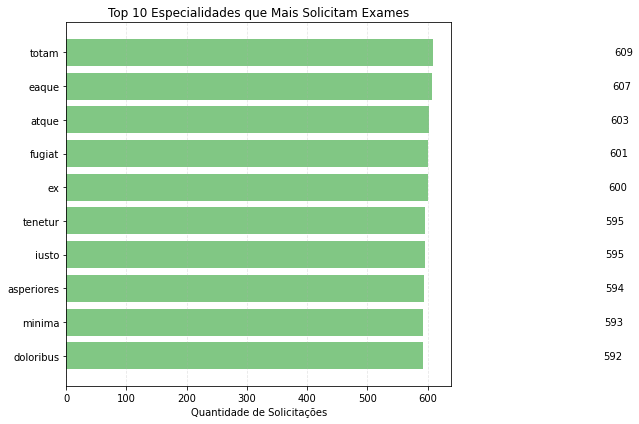

In [0]:
top_especialidades = (
    df_exames_silver.groupBy("especialidade_solicitante")
    .count()
    .orderBy("count", ascending=False)
    .limit(10)
)

top_especialidades_pd = top_especialidades.toPandas()

plt.figure(figsize=(10,6))
bars = plt.barh(top_especialidades_pd["especialidade_solicitante"], top_especialidades_pd["count"], color="#81c784")
plt.title("Top 10 Especialidades que Mais Solicitam Exames")
plt.xlabel("Quantidade de Solicitações")
plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()
    plt.text(width + 300, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center')

plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.show()
